In [2]:
from pathlib import Path
import geopandas as gpd
import matplotlib.pyplot as plt
import shapely as sp
import random
import cv2
import math
import numpy as np
import pandas as pd

Get Bounds of Initial Dataset

In [3]:
data_folder = Path("data/roadimages")
no_roads_folder = "1 _ No Roads"

file_paths = [file_path for file_path in data_folder.rglob("*") if file_path.is_file() and no_roads_folder not in file_path.parts]

file_names = [file_path.stem for file_path in data_folder.rglob("*") if file_path.is_file() and no_roads_folder not in file_path.parts]

file_parts = [file_name.split("_") for file_name in file_names]

sorted_file_parts = sorted(file_parts, key=lambda x: float(x[-1]))

min_lon = float(sorted_file_parts[0][-1])
max_lon = float(sorted_file_parts[-1][-1])
sorted_file_parts

sorted_file_parts = sorted(file_parts, key=lambda x: float(x[-2]))
min_lat = float(sorted_file_parts[0][-2])
max_lat = float(sorted_file_parts[-1][-2])
#sorted_file_parts


print("Minimum latitude:", min_lat)
print("Maximum latitude:", max_lat)

print("Minimum longitude:", min_lon)
print("Maximum longitude:", max_lon)

Minimum latitude: 14.501167
Maximum latitude: 14.69918
Minimum longitude: 120.963593
Maximum longitude: 121.105042


In [4]:
shape = gpd.read_file("data/shapefiles/gis_osm_roads_free_1.shp")
dataset_area = gpd.read_file("data/shapefiles/dataset_area.shp")

dataset_area

,geometry
0,"POLYGON ((120.93428 14.47773, 121.1335 14.4739..."


In [5]:
dataset_roads = shape[dataset_area['geometry'].item().contains(shape['geometry'])]

dataset_roads.count()

osm_id      142331
code        142331
fclass      142331
name         59119
ref           5241
oneway      142331
maxspeed    142331
layer       142331
bridge      142331
tunnel      142331
geometry    142331
dtype: int64

In [6]:
dataset_roads.head()

,osm_id,code,fclass,name,ref,oneway,maxspeed,layer,bridge,tunnel,geometry
0,267,5152,cycleway,Maharlika Street,None,B,25,0,F,F,"LINESTRING (121.05212 14.6503, 121.05223 14.65..."
2,2667097,5113,primary,Taft Avenue,170,F,60,0,F,F,"LINESTRING (120.99671 14.55627, 120.9967 14.55..."
3,2667099,5113,primary,Lerma Street,170,F,50,0,F,F,"LINESTRING (120.98539 14.6046, 120.98545 14.60..."
4,2667105,5122,residential,E. Manaloto Street,None,B,0,0,F,F,"LINESTRING (120.9938 14.54125, 120.99497 14.54..."
5,2667111,5113,primary,Quezon Boulevard,170,F,60,0,F,F,"LINESTRING (120.98018 14.59292, 120.98002 14.5..."


<Axes: >

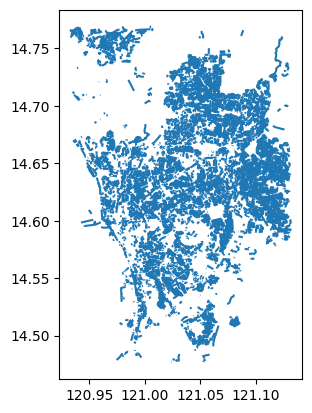

In [7]:
dataset_roads[:10000].plot()

In [8]:
dataset_roads['fclass'].unique()

array(['cycleway', 'primary', 'residential', 'secondary', 'tertiary',
       'motorway', 'trunk', 'primary_link', 'trunk_link', 'service',
       'unclassified', 'footway', 'steps', 'pedestrian', 'secondary_link',
       'motorway_link', 'tertiary_link', 'track', 'path', 'busway',
       'track_grade4', 'living_street', 'bridleway', 'track_grade5',
       'track_grade1'], dtype=object)

,osm_id,code,fclass,name,ref,oneway,maxspeed,layer,bridge,tunnel,geometry
711,4483587,5122,residential,Zodiac Street,None,B,0,0,F,F,"LINESTRING (121.03515 14.55605, 121.03552 14.5..."
1370,4940456,5122,residential,Recoletos Street,None,B,0,0,F,F,"LINESTRING (121.03432 14.55529, 121.03434 14.5..."
5901,14712757,5113,primary,Kalayaan Overpass,191,F,60,1,T,F,"LINESTRING (121.03568 14.55571, 121.03538 14.5..."
7659,22882909,5115,tertiary,Jupiter Street,None,B,30,0,F,F,"LINESTRING (121.03501 14.55593, 121.03494 14.5..."
23798,28535210,5115,tertiary,Zodiac Street,None,B,30,0,F,F,"LINESTRING (121.03501 14.55593, 121.03485 14.5..."
23859,28538743,5112,trunk,EDSA,1,F,60,0,F,F,"LINESTRING (121.03549 14.55549, 121.03522 14.5..."
23975,28574025,5132,trunk_link,None,None,F,0,1,T,F,"LINESTRING (121.03487 14.55522, 121.03495 14.5..."
29108,29213181,5112,trunk,EDSA,1,F,60,0,F,F,"LINESTRING (121.03508 14.55511, 121.0349 14.55..."
29110,29213301,5113,primary,Kalayaan Overpass,191,F,60,1,T,F,"LINESTRING (121.03447 14.55542, 121.03459 14.5..."
173565,146300437,5113,primary,Senator Gil J. Puyat Avenue,190,F,40,0,F,F,"LINESTRING (121.03507 14.55532, 121.03501 14.5..."


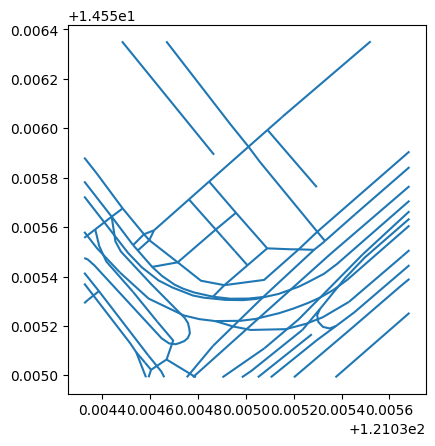

In [9]:
centerx, centery = (121.035004, 14.555672)

offset = 0.00068
minx, miny, maxx, maxy = (centerx - offset, centery - offset, centerx + offset, centery + offset)
bbox = sp.geometry.box(minx, miny, maxx, maxy)

road_patch = dataset_roads.cx[minx:maxx, miny:maxy]
road_patch.loc[:, 'geometry'] = road_patch['geometry'].apply(lambda geom: geom.intersection(bbox))
road_patch = road_patch[~road_patch.is_empty]

road_patch.plot()

road_patch

In [14]:
PATCH_SIZE = 512 # Size of the patches
EARTH_CIRCUFERENCE = 40075016.686 # in meters
SEARCH_INTERVAL = 50  # Distance between interpolated points
SEARCH_RANGE = 10 # pixels the road can be adjusted to find the best fit [coords-SEARCH_RANGE, coords+SEARCH_RANGE]
LINE_LENGTH = 20  # Total length of perpendicular lines
MAX_DISTANCE_FROM_ROAD = 50 # Maximum distance a point can be from a road mask
MAX_ROAD_WIDTH = 150 # Maximum width of a road for it to be considered
LAT_SIZE = 0.0013364 # Estimated degrees per 512 pixels (latitude)
LONG_SIZE = 0.00137216 # Estimated degrees per 512 pixels (longitude)

Display Random Patch

data\roadmasks\7__14.579596_121.063843.png
Random patch path: data\roadimages\4 _ Wide Roads\7__14.579596_121.063843.png


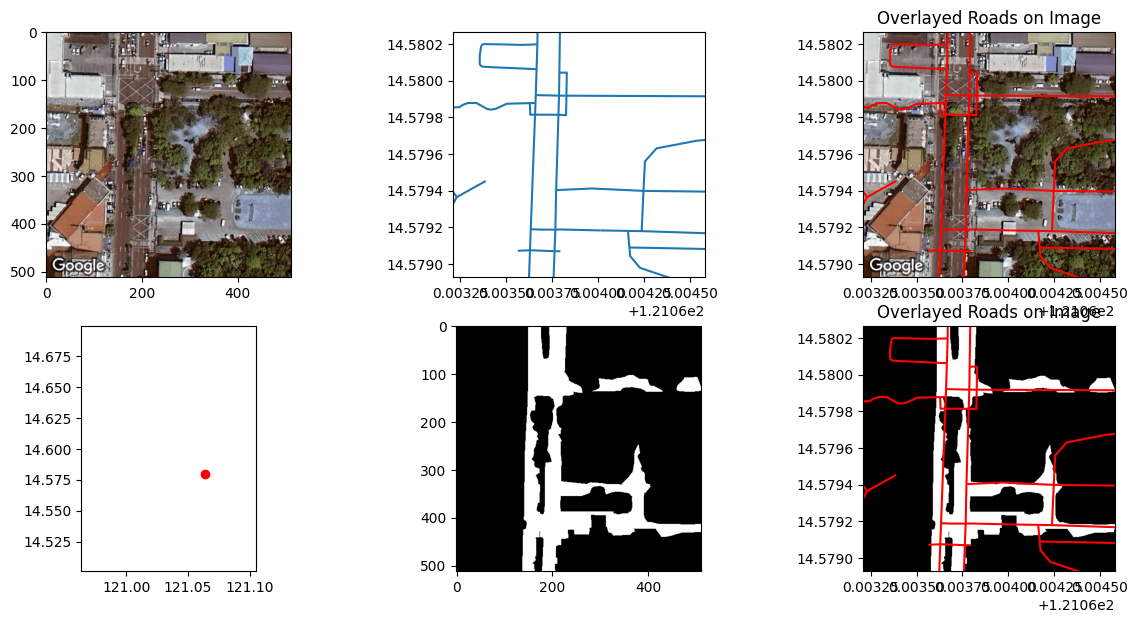

In [268]:
#get file paths
#data\roadimages\3 _ Clear Regular Roads\57__14.557001_121.006165.png
DISPLAY_ALLOWANCE = 0.0000

random_patch_path = random.choice(file_paths)
folder_names = ["\\1 _ No Roads", "\\2 _ Roads with Occlusions", "\\3 _ Clear Regular Roads", "\\4 _ Wide Roads"]
mask_path = str(random_patch_path).replace("roadimages", "roadmasks")

#remove folder names from mask paths
for folder_name in folder_names:
    mask_path = mask_path.replace(folder_name, "")
print(mask_path)

#set patch size
lat_size = LAT_SIZE/2
long_size = LONG_SIZE/2
#right = increase lon offset; up = increase lat offset
lat_shift = 0.0000
lon_shift = -0.000053
random_patch_lat = float(random_patch_path.stem.split("_")[-2])
random_patch_lon = float(random_patch_path.stem.split("_")[-1])

#adjust linestring coordinates 
minx, miny, maxx, maxy = (random_patch_lon - long_size, random_patch_lat - lat_size, random_patch_lon + long_size, random_patch_lat + lat_size)
minx = minx - lon_shift
maxx = maxx - lon_shift
miny = miny - lat_shift
maxy = maxy - lat_shift
bbox = sp.geometry.box(minx, miny, maxx, maxy)

#remove roads outside of patch
random_patch_roads = dataset_roads.cx[minx:maxx, miny:maxy]

print("Random patch path:", random_patch_path)

image = cv2.imread(str(random_patch_path))
mask_image = cv2.imread(str(mask_path))

if random_patch_roads.empty:
    print("No roads found in the random patch.")
    plt.imshow(image)
else:

    #show road patch
    fig, axes = plt.subplots(2, 3, figsize=(15, 7))
    axes[0][0].imshow(image)

    #plot linestrings (roadlines)
    random_patch_roads.plot(ax=axes[0][1])

    axes[0][1].set_xlim(minx-DISPLAY_ALLOWANCE, maxx+DISPLAY_ALLOWANCE)
    axes[0][1].set_ylim(miny-DISPLAY_ALLOWANCE, maxy+DISPLAY_ALLOWANCE)
    axes[0][1].set_aspect('equal')

    #overlay linestrings on patch
    axes[0][2].imshow(image, extent=[minx, maxx, miny, maxy])
    random_patch_roads.plot(ax=axes[0][2], color='red')
    axes[0][2].set_title("Overlayed Roads on Image")
    axes[0][2].set_xlim(minx-DISPLAY_ALLOWANCE, maxx+DISPLAY_ALLOWANCE)
    axes[0][2].set_ylim(miny-DISPLAY_ALLOWANCE, maxy+DISPLAY_ALLOWANCE)
    axes[0][2].set_aspect('equal')

    #coordinates relative to total dataset area
    axes[1][0].scatter(random_patch_lon, random_patch_lat, color='red')
    axes[1][0].set_xlim(min_lon, max_lon)
    axes[1][0].set_ylim(min_lat, max_lat)
    axes[1][0].set_aspect('equal')
    
    #ground truth mask
    axes[1][1].imshow(mask_image)

    #overlay linestrings on ground truth mask
    axes[1][2].imshow(mask_image, extent=[minx, maxx, miny, maxy])
    random_patch_roads.plot(ax=axes[1][2], color='red')
    axes[1][2].set_title("Overlayed Roads on Image")
    axes[1][2].set_xlim(minx, maxx)
    axes[1][2].set_ylim(miny, maxy)
    axes[1][2].set_aspect('equal')

    plt.show()


In [269]:
random_patch_roads

,osm_id,code,fclass,name,ref,oneway,maxspeed,layer,bridge,tunnel,geometry
27947,29104061,5141,service,None,None,F,0,0,F,F,"LINESTRING (121.06401 14.57918, 121.06416 14.5..."
27948,29104069,5141,service,None,None,B,0,0,F,F,"LINESTRING (121.06424 14.57918, 121.06425 14.5..."
34063,30989150,5153,footway,None,None,B,0,0,F,F,"LINESTRING (121.06416 14.57918, 121.06417 14.5..."
67807,60190311,5121,unclassified,Saint Paul Road,None,B,35,0,F,F,"LINESTRING (121.06366 14.57992, 121.06379 14.5..."
67813,60193930,5121,unclassified,Saint Paul Road,None,B,35,0,F,F,"LINESTRING (121.06583 14.57991, 121.06575 14.5..."
592976,658730459,5114,secondary,Meralco Avenue,None,F,40,0,F,F,"LINESTRING (121.06367 14.5804, 121.06367 14.5802)"
592977,658730463,5114,secondary,Meralco Avenue,None,F,40,0,F,F,"LINESTRING (121.06366 14.57992, 121.06366 14.5..."
646545,705674346,5141,service,None,None,F,0,0,F,F,"LINESTRING (121.06377 14.57919, 121.06379 14.5..."
695069,752923151,5153,footway,None,None,B,0,0,F,F,"LINESTRING (121.06417 14.57909, 121.06466 14.5..."
718802,775188020,5153,footway,None,None,B,0,0,F,F,"LINESTRING (121.06363 14.57988, 121.06363 14.5..."


In [270]:
#create scaled version of cropped linemap to fit mask
# Calculate scaling factors
# Function to scale geometries
def scale_geometry(geom, x_scale, y_scale):
    return sp.affinity.scale(geom, xfact=x_scale, yfact=y_scale, origin=(0,0))

def shift_geometry(geom, x_shift, y_shift):
    return sp.affinity.translate(geom, xoff=-x_shift, yoff=-y_shift)

# Create a copy of the GeoDataFrame and apply scaling to the copy
scaled_patch_roads = random_patch_roads.copy()

scaled_patch_roads["geometry_scaled"] = scaled_patch_roads["geometry"].apply(
    lambda geom: shift_geometry(geom, minx, miny)
)
scaled_patch_roads["geometry_scaled"] = scaled_patch_roads["geometry_scaled"].apply(
    lambda geom: scale_geometry(geom, 512/(maxx-minx), 512/(maxy-miny))
)

x_shift_initial = minx
y_shift_initial = miny
x_scale = 512/(maxx-minx)
y_scale = 512/(maxy-miny)

scaled_patch_roads

,osm_id,code,fclass,name,ref,oneway,maxspeed,layer,bridge,tunnel,geometry,geometry_scaled
27947,29104061,5141,service,None,None,F,0,0,F,F,"LINESTRING (121.06401 14.57918, 121.06416 14.5...","LINESTRING (299.50746 97.58037, 355.77612 96.5..."
27948,29104069,5141,service,None,None,B,0,0,F,F,"LINESTRING (121.06424 14.57918, 121.06425 14.5...","LINESTRING (383.83582 96.0862, 387.41791 180.1..."
34063,30989150,5153,footway,None,None,B,0,0,F,F,"LINESTRING (121.06416 14.57918, 121.06417 14.5...","LINESTRING (355.77612 96.58426, 358.83582 61.9..."
67807,60190311,5121,unclassified,Saint Paul Road,None,B,35,0,F,F,"LINESTRING (121.06366 14.57992, 121.06379 14.5...","LINESTRING (168.23881 380.39868, 215.55224 379..."
67813,60193930,5121,unclassified,Saint Paul Road,None,B,35,0,F,F,"LINESTRING (121.06583 14.57991, 121.06575 14.5...","LINESTRING (977.64179 375.6097, 946.14925 375...."
592976,658730459,5114,secondary,Meralco Avenue,None,F,40,0,F,F,"LINESTRING (121.06367 14.5804, 121.06367 14.5802)","LINESTRING (172.19403 563.10805, 171.52239 486..."
592977,658730463,5114,secondary,Meralco Avenue,None,F,40,0,F,F,"LINESTRING (121.06366 14.57992, 121.06366 14.5...","LINESTRING (168.23881 380.39868, 167.64179 363..."
646545,705674346,5141,service,None,None,F,0,0,F,F,"LINESTRING (121.06377 14.57919, 121.06379 14.5...","LINESTRING (208.12687 99.15115, 218.12687 99.5..."
695069,752923151,5153,footway,None,None,B,0,0,F,F,"LINESTRING (121.06417 14.57909, 121.06466 14.5...","LINESTRING (358.83582 61.95031, 542.90299 58.1..."
718802,775188020,5153,footway,None,None,B,0,0,F,F,"LINESTRING (121.06363 14.57988, 121.06363 14.5...","LINESTRING (156.07463 363.61808, 157.08209 339..."


In [271]:
def get_binary_mask_from_image(image):
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, image_mask = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)
    return np.flipud(image_mask)

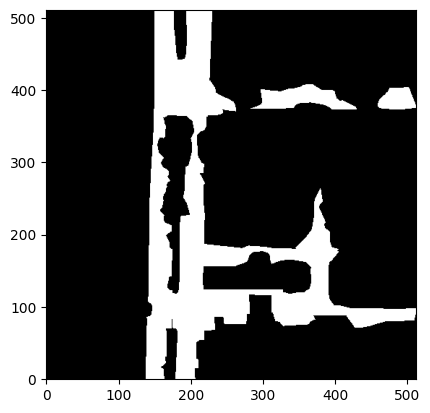

In [272]:
image_mask = get_binary_mask_from_image(mask_image)
plt.imshow(image_mask, cmap='gray')
plt.gca().invert_yaxis()

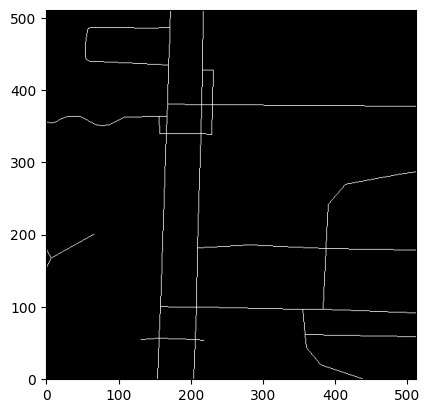

In [273]:
def get_binary_mask_from_roads(scaled_patch_roads):
    road_mask = np.zeros((512, 512), dtype=np.uint8)
    for geom in scaled_patch_roads["geometry_scaled"]:
        if geom.is_empty:
            continue
        if isinstance(geom, sp.LineString):
            coords = np.array(geom.coords, dtype=np.int32)
            cv2.polylines(road_mask, [coords], isClosed=False, color=1, thickness=1)
    return road_mask

road_mask = get_binary_mask_from_roads(scaled_patch_roads)
plt.imshow(road_mask, cmap='gray')
plt.gca().invert_yaxis()


In [274]:
def get_intersection(road_mask, image_mask):
    return np.sum((road_mask > 0) & (image_mask > 0))

In [275]:
shifted_road_masks = [[None for _ in range(2 * SEARCH_RANGE + 1)] for _ in range(2 * SEARCH_RANGE + 1)]

for i in range(-SEARCH_RANGE, SEARCH_RANGE + 1):
    for j in range(-SEARCH_RANGE, SEARCH_RANGE + 1):
        road_copy = scaled_patch_roads.copy()
        road_copy["geometry_scaled"] = road_copy["geometry_scaled"].apply(
            lambda geom: shift_geometry(geom, i, j)
        )
        road_mask = get_binary_mask_from_roads(road_copy)
        shifted_road_masks[i + SEARCH_RANGE][j + SEARCH_RANGE] = road_mask

max_intersection = -1
max_i = -1
max_j = -1

# Iterate through the shifted_road_masks to find the greatest intersection
for i in range(2 * SEARCH_RANGE + 1):
    for j in range(2 * SEARCH_RANGE + 1):
        road_mask = shifted_road_masks[i][j]
        intersection = get_intersection(road_mask, image_mask)
        if intersection > max_intersection:
            max_intersection = intersection
            max_i = i
            max_j = j

best_road_mask = shifted_road_masks[max_i][max_j]

best_shift_values = (max_i - SEARCH_RANGE, max_j - SEARCH_RANGE)


x_shift_second, y_shift_second = best_shift_values[0], best_shift_values[1]

print(f"Maximum intersection: {max_intersection}")
print(f"Shift coordinates: ({max_i - SEARCH_RANGE}, {max_j - SEARCH_RANGE})")

Maximum intersection: 2112
Shift coordinates: (9, 3)


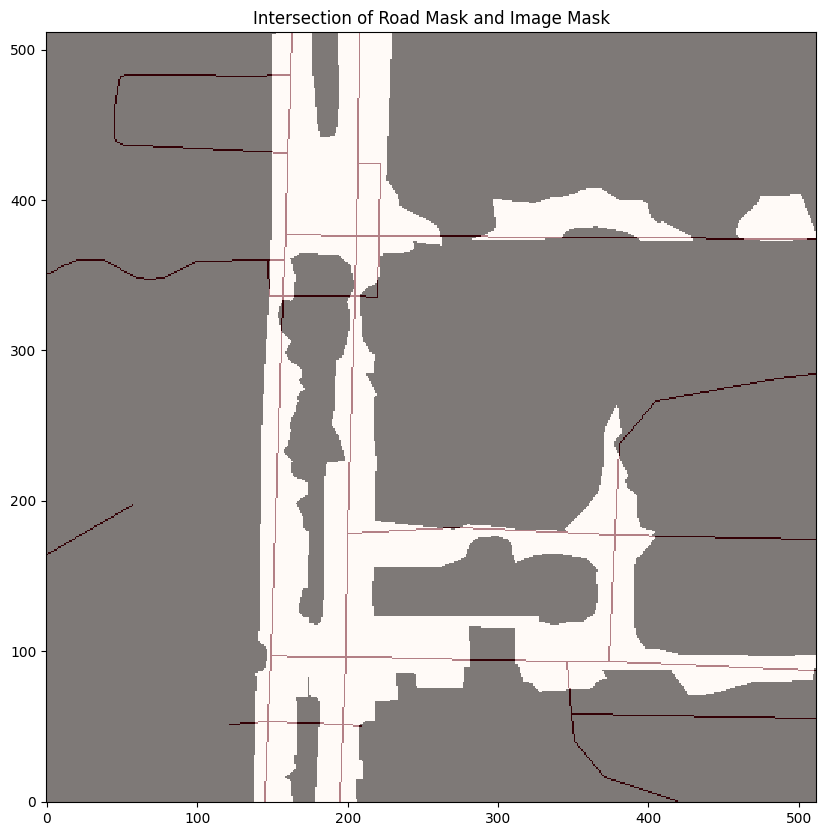

In [276]:
plt.figure(figsize=(10, 10))
plt.imshow(image_mask, cmap='gray', interpolation='none')
plt.imshow(best_road_mask, cmap='Reds', alpha=0.5, interpolation='none')  # Overlay road_mask in red with transparency
plt.title("Intersection of Road Mask and Image Mask")
plt.gca().invert_yaxis()
plt.show()

In [277]:
scaled_patch_roads["geometry_scaled"] = scaled_patch_roads["geometry_scaled"].apply(
    lambda geom: shift_geometry(geom, best_shift_values[0], best_shift_values[1])
)

scaled_patch_roads

,osm_id,code,fclass,name,ref,oneway,maxspeed,layer,bridge,tunnel,geometry,geometry_scaled
27947,29104061,5141,service,None,None,F,0,0,F,F,"LINESTRING (121.06401 14.57918, 121.06416 14.5...","LINESTRING (290.50746 94.58037, 346.77612 93.5..."
27948,29104069,5141,service,None,None,B,0,0,F,F,"LINESTRING (121.06424 14.57918, 121.06425 14.5...","LINESTRING (374.83582 93.0862, 378.41791 177.1..."
34063,30989150,5153,footway,None,None,B,0,0,F,F,"LINESTRING (121.06416 14.57918, 121.06417 14.5...","LINESTRING (346.77612 93.58426, 349.83582 58.9..."
67807,60190311,5121,unclassified,Saint Paul Road,None,B,35,0,F,F,"LINESTRING (121.06366 14.57992, 121.06379 14.5...","LINESTRING (159.23881 377.39868, 206.55224 376..."
67813,60193930,5121,unclassified,Saint Paul Road,None,B,35,0,F,F,"LINESTRING (121.06583 14.57991, 121.06575 14.5...","LINESTRING (968.64179 372.6097, 937.14925 372...."
592976,658730459,5114,secondary,Meralco Avenue,None,F,40,0,F,F,"LINESTRING (121.06367 14.5804, 121.06367 14.5802)","LINESTRING (163.19403 560.10805, 162.52239 483..."
592977,658730463,5114,secondary,Meralco Avenue,None,F,40,0,F,F,"LINESTRING (121.06366 14.57992, 121.06366 14.5...","LINESTRING (159.23881 377.39868, 158.64179 360..."
646545,705674346,5141,service,None,None,F,0,0,F,F,"LINESTRING (121.06377 14.57919, 121.06379 14.5...","LINESTRING (199.12687 96.15115, 209.12687 96.5..."
695069,752923151,5153,footway,None,None,B,0,0,F,F,"LINESTRING (121.06417 14.57909, 121.06466 14.5...","LINESTRING (349.83582 58.95031, 533.90299 55.1..."
718802,775188020,5153,footway,None,None,B,0,0,F,F,"LINESTRING (121.06363 14.57988, 121.06363 14.5...","LINESTRING (147.07463 360.61808, 148.08209 336..."


In [278]:
def interpolate_points(line, distance_interval):
    length = line.length
    num_points = math.ceil(length / distance_interval)
    distances = [i * distance_interval for i in range(num_points + 1)]
    points = [line.interpolate(distance) for distance in distances]
    #remove points that are out of bounds
    points = [point for point in points if point.x >= 0 and point.x < 512 and point.y >= 0 and point.y < 512]
    return points

In [279]:
def perpendicular_line_eq(line, point):
    coords = list(line.coords)

    for i in range(len(coords) - 1):
        x1, y1 = coords[i]
        x2, y2 = coords[i + 1]
        segment = sp.LineString([(x1, y1), (x2, y2)])

        if segment.distance(point) <= 1e-7:  # Check if point is close to the segment
            # Compute original slope
            if x2 - x1 == 0:  # Vertical line
                return (0, point.y)
            elif y2 - y1 == 0:  # Horizontal line
                return (float('inf'), point.x)
            
            slope = (y2 - y1) / (x2 - x1)
            perp_slope = -1 / slope  # Perpendicular slope

            x, y = point.x, point.y
            b = y - perp_slope * x

            return (perp_slope, b)
    
    return None

In [280]:
#gets point slope pairs of a road line
def compute_points_and_perpendiculars(road_line, distance_interval):
    point_slope_pairs = []
    points = interpolate_points(road_line, distance_interval)
    for point in points:
                perp_result = perpendicular_line_eq(road_line, point)
                if perp_result is not None:
                    slope, intercept = perp_result
                    point_slope_pairs.append((point, slope))
    return point_slope_pairs
    

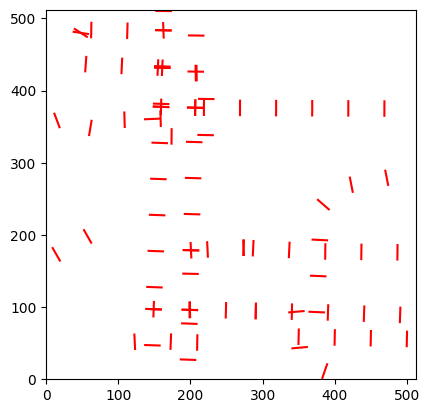

In [281]:
bbox = sp.geometry.box(0, 0, 512, 512)
point_line_eq = []
for road in scaled_patch_roads['geometry_scaled'].items():
    geom = road[1]
    
    if isinstance(geom, sp.MultiLineString):
        for line in geom.geoms:
            point_slope_pairs = compute_points_and_perpendiculars(line, SEARCH_INTERVAL)
            for point_slope_pair in point_slope_pairs:
                point, slope = point_slope_pair
                if slope == float('inf'):
                    x1, x2 = point.x, point.x
                    y1, y2 = point.y - LINE_LENGTH / 2, point.y + LINE_LENGTH / 2
                    plt.plot([x1, x2], [y1, y2], color='red')
                else:
                    dx = LINE_LENGTH / (2 * (1 + slope ** 2) ** 0.5)
                    dy = slope * dx
                    x1, y1 = point.x - dx, point.y - dy
                    x2, y2 = point.x + dx, point.y + dy
                    plt.plot([x1, x2], [y1, y2], color='red')
    elif isinstance(geom, sp.LineString):
        point_slope_pairs = compute_points_and_perpendiculars(geom, SEARCH_INTERVAL)
        for point_slope_pair in point_slope_pairs:
            point, slope = point_slope_pair
            if slope == float('inf'):
                x1, x2 = point.x
                y1, y2 = point.y - LINE_LENGTH / 2, point.y + LINE_LENGTH / 2
                plt.plot([x1, x2], [y1, y2], color='red')
            else:
                dx = LINE_LENGTH / (2 * (1 + slope ** 2) ** 0.5)
                dy = slope * dx
                x1, y1 = point.x - dx, point.y - dy
                x2, y2 = point.x + dx, point.y + dy
                plt.plot([x1, x2], [y1, y2], color='red')

plt.xlim(0, 512)
plt.ylim(0, 512)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

In [282]:
import math
import matplotlib.pyplot as plt

def measure_nearest_road_to_point(point, slope, image_mask, plot=True):
    min_distance = 2
    x, y = int(point.x), int(point.y)
    width, height = image_mask.shape  # Fix: Ensure correct order (height, width)

    # Check if the point is inside the image bounds
    if not (0 <= x < width and 0 <= y < height):
        return None  # Ensure point is within bounds

    search_mode = "inside" if image_mask[y, x] == 255 else "outside"
    points_forward = []
    points_backward = []

    if slope == float('inf'):  # **Vertical case**
        # Move upward (-y direction)
        found_white = False
        for i in range(y - 1, -1, -1):
            if search_mode == "inside" and (image_mask[i, x] == 0 or i == 0 or i == height - 1):
                points_backward.append((x, i))
                break
            if search_mode == "outside":
                if image_mask[i, x] == 255 and not found_white:
                    points_backward.append((x, i))
                    found_white = True
                    continue
                if found_white and image_mask[i, x] == 0:
                    points_backward.append((x, i))
                    break

        # Move downward (+y direction)
        found_white = False
        for i in range(y + 1, height):
            if search_mode == "inside" and (image_mask[i, x] == 0 or i == 0 or i == height - 1):
                points_forward.append((x, i))
                break
            if search_mode == "outside":
                if image_mask[i, x] == 255 and not found_white:
                    points_forward.append((x, i))
                    found_white = True
                    continue
                if found_white and image_mask[i, x] == 0:
                    points_forward.append((x, i))
                    break

    else:  # **Non-vertical case (diagonal/horizontal)**
        step_size = 1 / max(abs(slope), 1)  # Normalize step size
        dx = step_size if slope >= 0 else -step_size
        dy = slope * dx

        # Move forward
        xi, yi = x + dx, y + dy
        found_white = False
        while 0 <= int(round(xi)) < width and 0 <= int(round(yi)) < height:
            if search_mode == "inside" and (image_mask[int(round(yi)), int(round(xi))] == 0 or int(round(xi)) == 0 or int(round(xi)) == width - 1 or int(round(yi)) == 0 or int(round(yi)) == height - 1):
                points_forward.append((int(round(xi)), int(round(yi))))
                break
            if search_mode == "outside":
                if image_mask[int(round(yi)), int(round(xi))] == 255 and not found_white:
                    points_forward.append((int(round(xi)), int(round(yi))))
                    found_white = True
                    xi += dx
                    yi += dy
                    continue
                if found_white and image_mask[int(round(yi)), int(round(xi))] == 0:
                    points_forward.append((int(round(xi)), int(round(yi))))
                    break
            xi += dx
            yi += dy

        # Move backward
        xi, yi = x - dx, y - dy
        found_white = False
        while 0 <= int(round(xi)) < width and 0 <= int(round(yi)) < height:
            if search_mode == "inside" and (image_mask[int(round(yi)), int(round(xi))] == 0 or int(round(xi)) == 0 or int(round(xi)) == width - 1 or int(round(yi)) == 0 or int(round(yi)) == height - 1):
                points_backward.append((int(round(xi)), int(round(yi))))
                break
            if search_mode == "outside":
                if image_mask[int(round(yi)), int(round(xi))] == 255 and not found_white:
                    points_backward.append((int(round(xi)), int(round(yi))))
                    found_white = True
                    xi -= dx
                    yi -= dy
                    continue
                if found_white and image_mask[int(round(yi)), int(round(xi))] == 0:
                    points_backward.append((int(round(xi)), int(round(yi))))
                    break
            xi -= dx
            yi -= dy

    # **Visualization**
    if plot:
        plt.imshow(image_mask, cmap='gray')
        plt.scatter(x, y, color='red', label='Start Point', edgecolors='black', marker='o')
        if points_forward:
            plt.scatter(*zip(*points_forward), color='blue', label='Forward Boundary', edgecolors='black', marker='x')
        if points_backward:
            plt.scatter(*zip(*points_backward), color='green', label='Backward Boundary', edgecolors='black', marker='s')
        plt.gca().invert_yaxis()
        plt.legend()
        plt.show()

    # **Return total measured width**
    if search_mode == "inside":
        if points_forward and points_backward:
            total_dist = math.dist((point.x, point.y), points_forward[0]) + math.dist((point.x, point.y), points_backward[0])
            if total_dist > MAX_ROAD_WIDTH:
                return None
            return total_dist
    else:
        forward_dist = math.dist(points_forward[0], points_forward[1]) if len(points_forward) > 1 else None
        backward_dist = math.dist(points_backward[0], points_backward[1]) if len(points_backward) > 1 else None
        if forward_dist is not None and forward_dist > MAX_ROAD_WIDTH:
            forward_dist = None
        if backward_dist is not None and backward_dist > MAX_ROAD_WIDTH:
            backward_dist = None

        if forward_dist is not None and backward_dist is not None:
            if math.dist((point.x, point.y), points_forward[0]) < math.dist((point.x, point.y), points_backward[0]) and math.dist((point.x, point.y), points_forward[0]) < MAX_DISTANCE_FROM_ROAD and forward_dist > 1.1:
                return forward_dist
            elif math.dist((point.x, point.y), points_backward[0]) < MAX_DISTANCE_FROM_ROAD and backward_dist > 1.1:
                return backward_dist
        elif forward_dist is not None and forward_dist > 1.1 and math.dist((point.x, point.y), points_forward[0]) < MAX_DISTANCE_FROM_ROAD:
            return forward_dist
        elif backward_dist is not None and backward_dist > 1.1 and math.dist((point.x, point.y), points_backward[0]) < MAX_DISTANCE_FROM_ROAD:
            return backward_dist

    return None

In [283]:
def convert_coords(point_i):
    point = shift_geometry(point_i, -x_shift_second, -y_shift_second)
    point = scale_geometry(point, 1/x_scale, 1/y_scale)
    point = shift_geometry(point, -x_shift_initial, -y_shift_initial)
    return point

In [284]:
#get width measurements of one road line
def measure_road_width(line,  image_mask, plot=False):
    point_slope_pairs = compute_points_and_perpendiculars(line, SEARCH_INTERVAL)
    widths = []
    for point_slope_pair in point_slope_pairs:
        point, slope = point_slope_pair
        width = measure_nearest_road_to_point((point), slope, image_mask, plot=plot)
        coords = convert_coords(point)
        if width is not None:
            widths.append((point_slope_pair, coords, width))
    return widths

In [285]:
test = scaled_patch_roads.copy()
print(test["geometry"].iloc[0])
point = sp.Point(test["geometry_scaled"].iloc[0].coords[0])
print(convert_coords(point))

LINESTRING (121.0640126 14.5791825, 121.0641634 14.5791799, 121.0642386 14.5791786, 121.064665 14.5791647, 121.0647375 14.5791711, 121.0647726 14.57921, 121.0648102 14.5792552, 121.0648029 14.5792954, 121.0647756 14.5793571, 121.0647521 14.5793923, 121.0642482 14.5793981, 121.0639672 14.5794113)
POINT (121.0640126 14.5791825)


C:\Users\rafae_ls0opq0\AppData\Local\Temp\ipykernel_16244\660870581.py:98: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(*zip(*points_forward), color='blue', label='Forward Boundary', edgecolors='black', marker='x')


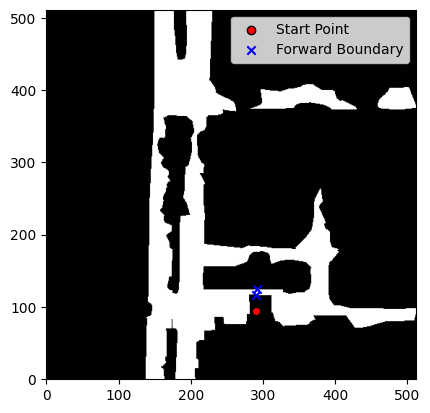

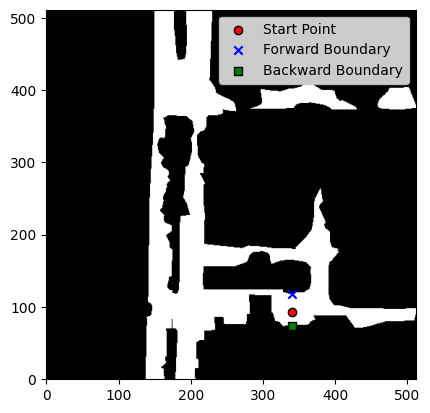

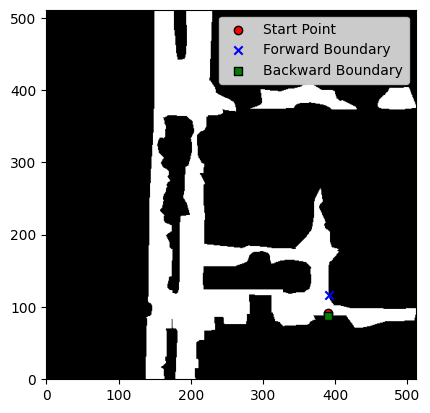

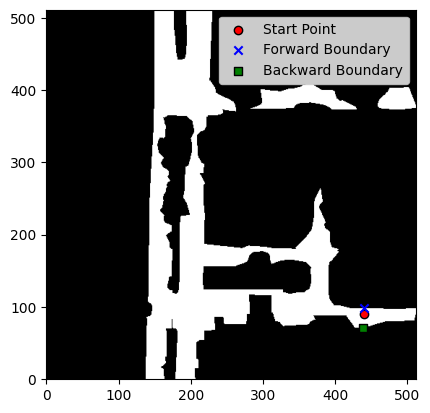

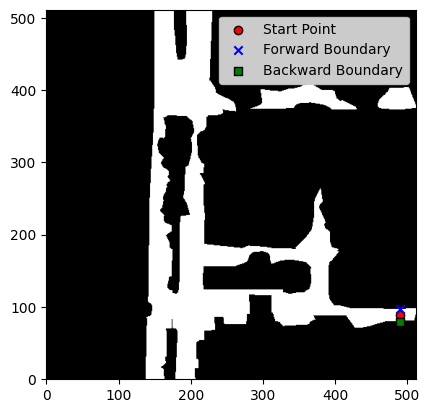

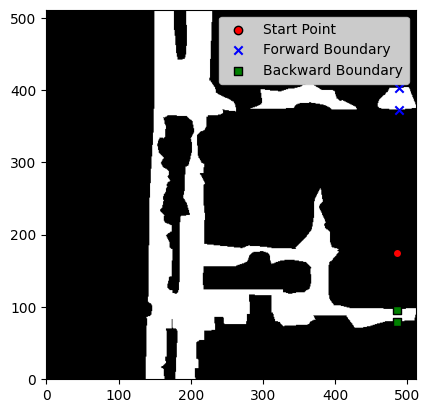

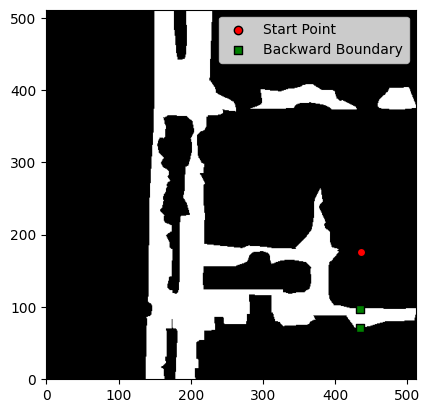

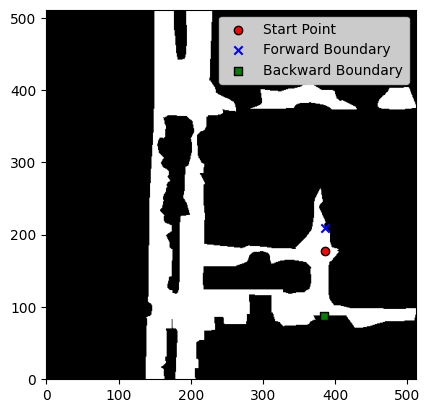

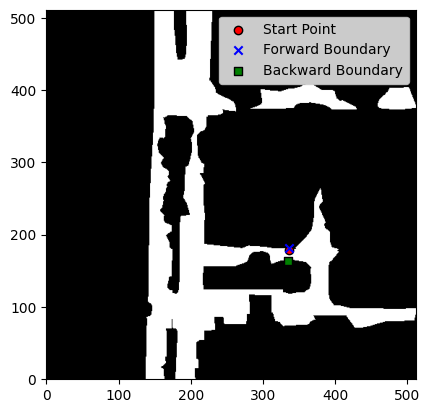

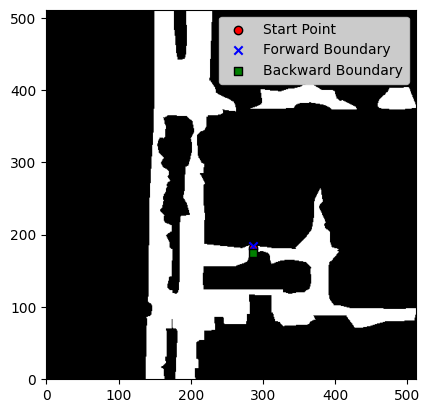

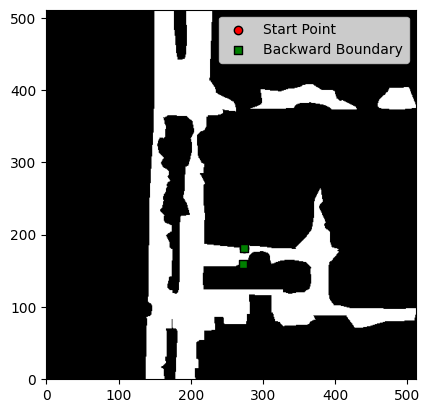

Average road width: 33.19 pixels


In [295]:
instance = scaled_patch_roads.iloc[0]
geom = instance['geometry_scaled']

if isinstance(geom, sp.MultiLineString):
    for line in geom.geoms:
        widths = measure_road_width(line, image_mask, True)
elif isinstance(geom, sp.LineString):
    widths = measure_road_width(geom, image_mask, True)

average_width = np.mean([width for _, _, width in widths])
print(f"Average road width: {average_width:.2f} pixels")

In [287]:
def get_patch_road_widths(roads, image_mask):
    road_widths = []
    for road in roads.itertuples():
        geom = road.geometry_scaled
        osm_id = road.osm_id
        if isinstance(geom, sp.MultiLineString):
            for line in geom.geoms:
                widths = measure_road_width(line, image_mask)
                road_widths.append((osm_id, widths))
        elif isinstance(geom, sp.LineString):
            widths = measure_road_width(geom, image_mask)
            road_widths.append((osm_id, widths))
    return road_widths

In [288]:
def get_patch_road_widths_df(roads, image_mask):
    road_widths = []
    for road in roads.itertuples():
        geom = road.geometry_scaled
        osm_id = road.osm_id
        if isinstance(geom, sp.MultiLineString):
            for line in geom.geoms:
                widths = measure_road_width(line, image_mask)
                for point_slope_pair, coords, width in widths:
                    point, slope = point_slope_pair
                    road_widths.append({
                        'osm_id': osm_id,
                        'coordinates_on_image': point,
                        'map_coordinates': coords,
                        'slope': slope,
                        'width': width
                    })
        elif isinstance(geom, sp.LineString):
            widths = measure_road_width(geom, image_mask)
            for point_slope_pair, coords, width in widths:
                point, slope = point_slope_pair
                road_widths.append({
                    'osm_id': osm_id,
                    'coordinates_on_image': point,
                    'map_coordinates': coords,
                    'slope': slope,
                    'width': width
                })
    return pd.DataFrame(road_widths)


In [289]:
patch_road_widths = get_patch_road_widths(scaled_patch_roads, image_mask)
patch_road_widths

[('29104061',
  [((<POINT (290.507 94.58)>, 56.48845615318797),
    <POINT (121.064 14.579)>,
    8.06225774829855),
   ((<POINT (340.5 93.695)>, 56.48845615318797),
    <POINT (121.064 14.579)>,
    45.01116507948706),
   ((<POINT (390.485 92.562)>, 29.876801915867826),
    <POINT (121.064 14.579)>,
    29.02679167392712),
   ((<POINT (440.457 90.89)>, 29.876801915867826),
    <POINT (121.064 14.579)>,
    27.06803107295561),
   ((<POINT (490.429 89.217)>, 29.876801915867826),
    <POINT (121.065 14.579)>,
    18.020865131749414),
   ((<POINT (386.745 177.082)>, 84.61513988389467),
    <POINT (121.064 14.579)>,
    122.02558378994095),
   ((<POINT (336.794 179.188)>, 20.733093234813893),
    <POINT (121.064 14.579)>,
    17.27181450608295),
   ((<POINT (286.852 181.597)>, 20.733093234813893),
    <POINT (121.064 14.579)>,
    10.19412149121102),
   ((<POINT (273.567 182.238)>, 20.733093234813893),
    <POINT (121.064 14.579)>,
    22.02271554554524)]),
 ('29104069',
  [((<POINT (376.9

In [290]:
patch_road_widths_df = get_patch_road_widths_df(scaled_patch_roads, image_mask)
patch_road_widths_df

,osm_id,coordinates_on_image,map_coordinates,slope,width
0,29104061,POINT (290.5074626863251 94.58036515988522),POINT (121.0640126 14.5791825),56.488456,8.062258
1,29104061,POINT (340.49962985930426 93.69536722265345),POINT (121.06414657900802 14.579180190017103),56.488456,45.011165
2,29104061,POINT (390.48546297140115 92.56239593776014),POINT (121.06428054104076 14.579177232785023),29.876802,29.026792
3,29104061,POINT (440.45747914631704 90.88979335078864),POINT (121.06441446604411 14.579172867030927),29.876802,27.068031
4,29104061,POINT (490.429495321233 89.21719076381713),POINT (121.06454839104745 14.57916850127683),29.876802,18.020865
...,...,...,...,...,...
57,1210686115,POINT (200.69402985272745 178.751571385823),POINT (121.0637719 14.5794022),-0.029621,103.098408
58,1210686115,POINT (202.17443117700157 228.72965069984915),POINT (121.06377586747556 14.579532650596086),-0.029621,22.147007
59,1210686115,POINT (203.65483250127568 278.7077300138753),POINT (121.0637798349511 14.57966310119217),-0.029621,25.040045
60,1210686115,POINT (205.1352338255498 328.68580932790144),POINT (121.06378380242666 14.579793551788255),-0.029621,9.105970


In [291]:
def generate_width_statistics(patch_road_widths_df):
    width_stats = patch_road_widths_df.groupby('osm_id')['width'].describe()
    return width_stats

In [292]:
width_statistics = generate_width_statistics(patch_road_widths_df)
width_statistics

,count,mean,std,min,25%,50%,75%,max
osm_id,,,,,,,,
1076133349,2.0,26.029117,7.078593,21.023796,23.526456,26.029117,28.531777,31.034438
1210686111,3.0,101.733495,20.507376,78.060472,95.568540,113.076608,113.570007,114.063406
1210686112,3.0,61.376697,28.892753,28.014220,53.034809,78.055398,78.057935,78.060472
1210686113,3.0,93.697514,53.914438,33.001226,72.528923,112.056621,124.045658,136.034695
1210686114,2.0,82.564369,75.707226,29.031277,55.797823,82.564369,109.330916,136.097462
1210686115,5.0,54.692503,49.713069,9.105970,22.147007,25.040045,103.098408,114.071083
29104061,9.0,33.189261,35.097587,8.062258,17.271815,22.022716,29.026792,122.025584
29104069,3.0,24.527746,12.878158,11.401754,18.220187,25.038619,31.090742,37.142865
30989150,1.0,103.401172,NaN,103.401172,103.401172,103.401172,103.401172,103.401172


In [293]:
#calculate m per pixel: https://wiki.openstreetmap.org/wiki/Zoom_levels
def meters_per_pixel(lat):
    return EARTH_CIRCUFERENCE * abs(math.cos(math.radians(lat))) / (512 * (2 ** 18))

In [294]:
avg_m_per_pixel = (meters_per_pixel(min_lat) + meters_per_pixel(max_lat)) / 2
(1/avg_m_per_pixel)

3.460925935231014